<center>
<img src="../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Anna Tarelina (@feuerengel), and Mikhail Korshchikov (@MS4). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

- Пост на хабре про [decision tree]()
- Тетрадь по [decision tree]()
- Пост на хабре про [регрессию]()


# <center>Assignment #2. Fall 2019
## <center> Part 1. Decision trees for classification and regression

**In this assignment, we will find out how a decision tree works in a regression task, then will build and tune classification decision trees for identifying heart diseases.**

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/lectures](https://mlcourse.ai/lectures) 

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1-xvxl0xjV4voDYIbcCxxpAc_pjcWEpnLQ9kaKLHwXsA). Solutions will be shared only with those who've filled in this form 
 
### <center> Deadline for A2: 2019 October 6, 20:59 CET (London time)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Decision trees for regression: a toy example

Let's consider the following one-dimensional regression problem. We need to build a function $\large a(x)$ to approximate the dependency $\large y = f(x)$ using the mean-squared error criterion: $\large \min \sum_i {(a(x_i) - f(x_i))}^2$.

[-2.   -1.33 -0.67  0.    0.67  1.33  2.  ]
[-8.   -2.37 -0.3   0.    0.3   2.37  8.  ]


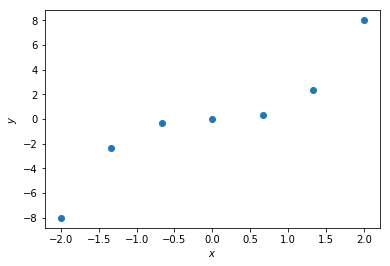

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

print(np.around(X, 2))
print(np.around(y, 2))

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Let's make several steps to build a decision tree. In the case of a **regression** task, at prediction time, the leaf returns the average value for all observations in this leaf.

Let's start with a tree of depth 0, i.e. all observations placed in a single leaf. 
<br>
 - You'll need to build a tree with only one node (also called **root**) that contains all train observations (instances). 


 
- How will predictions of this tree look like for $x \in [-2, 2]$?   
     Create an appropriate plot using a pen, paper and Python if needed (but no `sklearn` is needed yet).

In [3]:
sum(np.power(y - np.mean(y), 2)) / len(X)

19.916127767979617

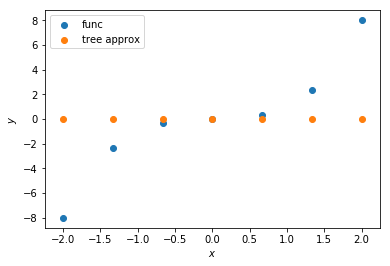

In [4]:
from  sklearn.tree import DecisionTreeRegressor
_1 = DecisionTreeRegressor(max_depth=1,
                           min_samples_leaf=5).fit(X.reshape(7, 1),
                                                   y)

plt.scatter(X, y, label="func")
plt.scatter(X, [0] * len(X), label="tree approx")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')      
plt.legend()

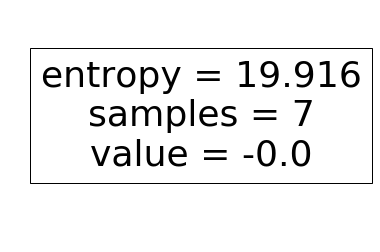

In [5]:
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz, plot_tree


plot_tree(_1, filled=True, feature_names=["x"]);

**Making first splits.**

Let's split the data according to the following condition $[x < 0]$. It gives us the tree of depth 1 with two leaves. To clarify, for all instances with $x \geqslant 0$ the tree will return some value, for all instances with $x < 0$ it will return another value. Let's create a similar plot for predictions of this tree.

In [6]:
_2 = DecisionTreeRegressor(max_depth=1,
                           min_samples_leaf=3).fit(X.reshape(7, 1),
                                                   y)


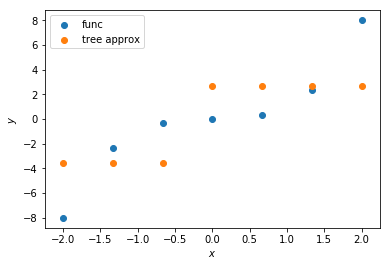

In [7]:
l = np.full(3,
            _2.predict([[-0.5]]))
r = np.full(4,
            _2.predict([[-0.1]]))

y_2 = np.append(l, r)
plt.scatter(X, y, label="func")
plt.scatter(X, y_2, label="tree approx")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')      
plt.legend()

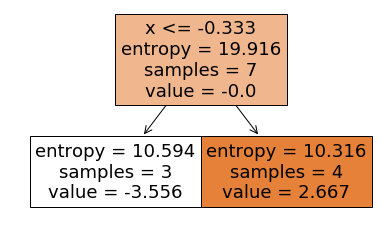

In [8]:
feature_names=["x"]

plot_tree(_2, feature_names=feature_names, filled=True); 

In the decision tree algorithm, the feature and the threshold for splitting are chosen according to some criterion. The commonly used criterion for regression is based on variance: $$\large Q(X, y, j, t) = D(X, y) - \dfrac{|X_l|}{|X|} D(X_l, y_l) - \dfrac{|X_r|}{|X|} D(X_r, y_r),$$
where $\large X$ and $\large y$ are a feature matrix and a target vector (correspondingly) for training instances in a current node, $\large X_l, y_l$ and $\large X_r, y_r$ are splits of samples $\large X, y$ into two parts w.r.t. $\large [x_j < t]$ (by $\large j$-th feature and threshold $\large t$), $\large |X|$, $\large |X_l|$, $\large |X_r|$ (or, the same, $\large |y|$, $\large |y_l|$, $\large |y_r|$) are sizes of appropriate samples, and $\large D(X, y)$ is variance of answers $\large y$ for all instances in $\large X$:
$$\large D(X, y) = \dfrac{1}{|X|} \sum_{j=1}^{|X|}(y_j – \dfrac{1}{|X|}\sum_{i = 1}^{|X|}y_i)^2$$
Here $\large y_i = y(x_i)$ is the answer for the $\large x_i$ instance. Feature index $\large j$ and threshold $\large t$ are chosen to maximize the value of criterion  $\large Q(X, y, j, t)$ for each split.

In our 1D case,  there's only one feature so $\large Q$ depends only on threshold $\large t$ and training data $\large X$ and $\large y$. Let's designate it $\large Q_{1d}(X, y, t)$ meaning that the criterion no longer depends on feature index $\large j$, i.e. in 1D case $\large j = 1$.

In [10]:
def regression_var_criterion(X, y, t):
    disp = lambda a: sum(np.power(a - np.mean(a), 2)) / len(a)
    
    i = np.where(X < t)[0][-1]
    D = disp(y)
    left_y = y[:i + 1]
    right_y = y[i + 1:]
    return disp(y) - (len(left_y) * disp(left_y) + len(right_y) * disp(right_y)) / len(X)
    

In [11]:
for t in (-1.9, -1.3, 0, 1.3, 1.9):
    print(regression_var_criterion(X, y, t))

10.666666666666663
10.754458161865568
9.48148148148148
10.754458161865568
10.666666666666666


Create the plot of criterion $\large Q_{1d}(X, y, t)$  as a function of threshold value $t$ on the interval $\large [-1.9, 1.9]$.

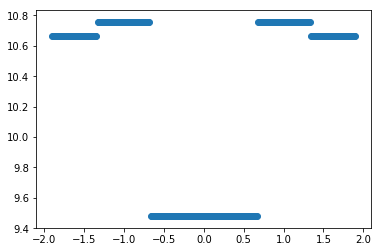

In [12]:
t = np.linspace(-1.9, 1.9, 201)
plt.scatter(t, list(map(lambda x: regression_var_criterion(X, y, x), t)))

**<font color='red'>Question 1.</font> What is the worst threshold value (to perform a split) according to the variance criterion?**

<font color = 'red'> **Answer options:** </font>
- -1.9
- -1.3
- **0 +**
- 1.3
- 1.9 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

Then let's make splitting in each of the leaves nodes. 
- Take your tree with first threshold [$x<0$].


- Now add a split in the left branch (where previous split was $x < 0$) using the criterion $[x < -1.5]$, in the right branch (where previous split was $x \geqslant 0$) with the following criterion $[x < 1.5]$. 


- It gives us a tree of depth 2 with 7 nodes and 4 leaves. Create a plot of this tree predictions for $x \in [-2, 2]$.

In [13]:
def some_tree(x):
    if x < 0:
        if x < -1.5:
            return -2
        else:
            return (-1)
    else:
        if x < 1.5:
            return 1
        else:
            return 2

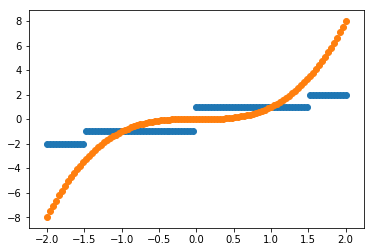

In [14]:
res = lambda massive: list(map(lambda x: some_tree(x), massive))

x_ = np.linspace(-2, 2, 101)
plt.scatter(x_, res(x_))
plt.scatter(x_, list(map(lambda a: a**3, x_)));

**<font color='red'>Question 2.</font> Tree predictions is a piecewise-constant function, right? How many "pieces" (horizontal segments in the plot that you've just built) are there in the interval [-2, 2]?**

<font color = 'red'> **Answer options:** </font>
- 2
- **4 +**
- 6
- 8

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

## 2. Building a decision tree for predicting heart diseases
Let's read the data on heart diseases. The dataset can be downloaded from the course repo from [here](https://github.com/Yorko/mlcourse.ai/blob/master/data/mlbootcamp5_train.csv) by clicking on `Download` and then selecting `Save As` option. If you work with Git, then the dataset is already there in `data/mlbootcamp5_train.csv`.

**Problem**

Predict presence or absence of cardiovascular disease (CVD) using the patient examination results.

**Data description**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [15]:
df = pd.read_csv('../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [16]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Transform the features: 
- create "age in years" dividing age by 365.25 and taking floor ($\lfloor{x}\rfloor$ is the largest integer that is less than or equal to $x$) 
- create 3 binary features based on `cholesterol`.
- create 3 binary features based on `gluc`.
<br> Binary features equal to 1, 2 or 3. This method is called dummy-encoding or One Hot Encoding (OHE). It is more convenient to use `pandas.get_dummies`. There is no need to use the original features `cholesterol` and `gluc` after encoding.

In [17]:
df["age in years"] = (df.age / 365.25).astype(int)

In [18]:
df = pd.get_dummies(df, columns=["cholesterol", "gluc"])

In [19]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [20]:
target_name = df.columns[df.columns == "cardio"]
feature_names = df.columns[df.columns != "cardio"]
X = df[feature_names]
y = df[target_name]

Split data into train and holdout parts in the proportion of 7/3 using `sklearn.model_selection.train_test_split` with `random_state=17`.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [24]:
X_train.shape[0] / ( X_valid.shape[0] + X_train.shape[0])

0.7

Train a decision tree on the dataset `(X_train, y_train)` with **max depth equal to 3** and `random_state=17`. Plot this tree with `sklearn.tree.export_graphviz` and Graphviz. Here we need to mention that `sklearn` doesn't draw decision trees on its own, but is able to output a tree in the `.dot` format that can be used by Graphviz for visualization. 

How to plot a decision tree, alternatives:
 1. Install Graphviz and pydotpus yourself (see below)
 2. Use our docker image with all needed packages already installed
 3. Easy way: execute `print(dot_data.getvalue())` with `dot_data` defined below (this can be done without pydotplus and Graphviz), go to http://www.webgraphviz.com, paste the graph code string (digraph Tree {...) and generate a nice picture

In [25]:
_3 = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

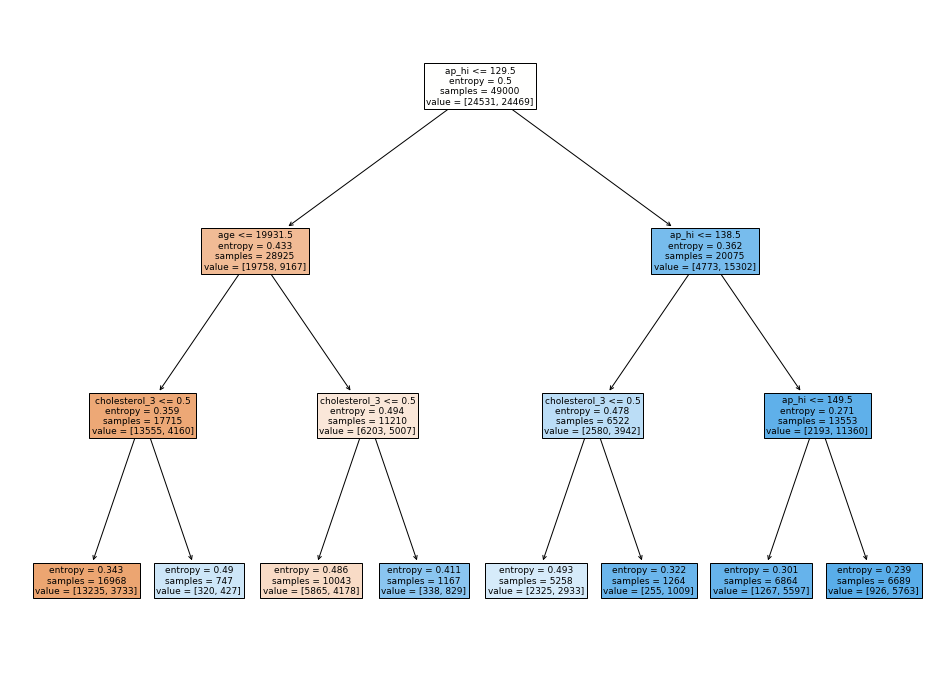

In [26]:
plt.rcParams['figure.figsize'] = (16, 12)
plot_tree(_3, filled=True, feature_names=feature_names);

There are may be some troubles with graphviz for Windows users.
The error is 'GraphViz's executables not found'.
<br>To fix that - install Graphviz from [here](https://graphviz.gitlab.io/_pages/Download/Download_windows.html).
<br>Then add graphviz path to your system PATH variable. You can do this manually, but don't forget to restart kernel.
<br>Or just run this code:

In [27]:
'''
import os
path_to_graphviz = '' # your path to graphviz (C:\\Program Files (x86)\\Graphviz2.38\\bin\\ for example) 
os.environ["PATH"] += os.pathsep + path_to_graphviz
'''

'\nimport os\npath_to_graphviz = \'\' # your path to graphviz (C:\\Program Files (x86)\\Graphviz2.38\\bin\\ for example) \nos.environ["PATH"] += os.pathsep + path_to_graphviz\n'

Take a look how trees are visualized in the [3rd part](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true) of course materials.

**<font color='red'>Question 3.</font> Which 3 features are used to make predictions in the created decision tree?**

<font color = 'red'> **Answer options:** </font>
- age, ap_lo, chol=1
- **age, ap_hi, chol=3 +**
- smoke, age, gender
- alco, weight, gluc=3

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

___
***

Make predictions for holdout data `(X_valid, y_valid)` with the trained decision tree. Calculate accuracy.

In [28]:
acc_1 = accuracy_score(y_valid, _3.predict(X_valid))

Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=17` and change  `max_depth` from 2 to 10.

In [29]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17),
                         cv=5, return_train_score=True, 
                         param_grid=tree_params).fit(X_train, y_train);

In [30]:
names_test_score = [name for name in tree_grid.cv_results_.keys() if (name.endswith("test_score") and name.startswith("split"))]
names_train_scote = [name for name in tree_grid.cv_results_.keys() if (name.endswith("train_score") and name.startswith("split"))]

In [31]:
tree_grid.cv_results_

{'mean_fit_time': array([0.038239  , 0.04832482, 0.0588057 , 0.07148561, 0.08146954,
        0.09265151, 0.10243587, 0.1134203 , 0.12520051]),
 'std_fit_time': array([0.00092582, 0.00058687, 0.00037365, 0.00101807, 0.00135437,
        0.00124723, 0.00058179, 0.00119648, 0.00255216]),
 'mean_score_time': array([0.00309482, 0.00329289, 0.00329661, 0.00329475, 0.00339456,
        0.00349631, 0.00339465, 0.0036921 , 0.00379267]),
 'std_score_time': array([0.00019972, 0.00024304, 0.00024628, 0.00024464, 0.00037371,
        0.00031577, 0.00019994, 0.00024262, 0.00024589]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

In [32]:
max_depth = list(range(2, 11))

Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

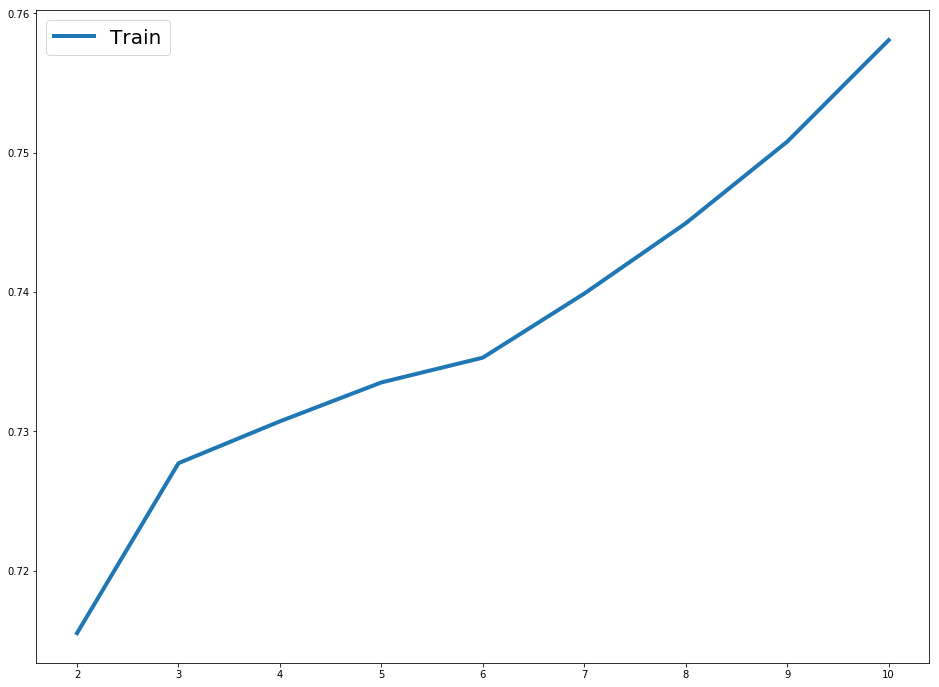

In [33]:
plt.plot(max_depth,
         np.mean([(tree_grid.cv_results_[name]) for name in names_train_scote], axis=0),
         label="Train", linewidth=4)
plt.legend(fontsize=20)

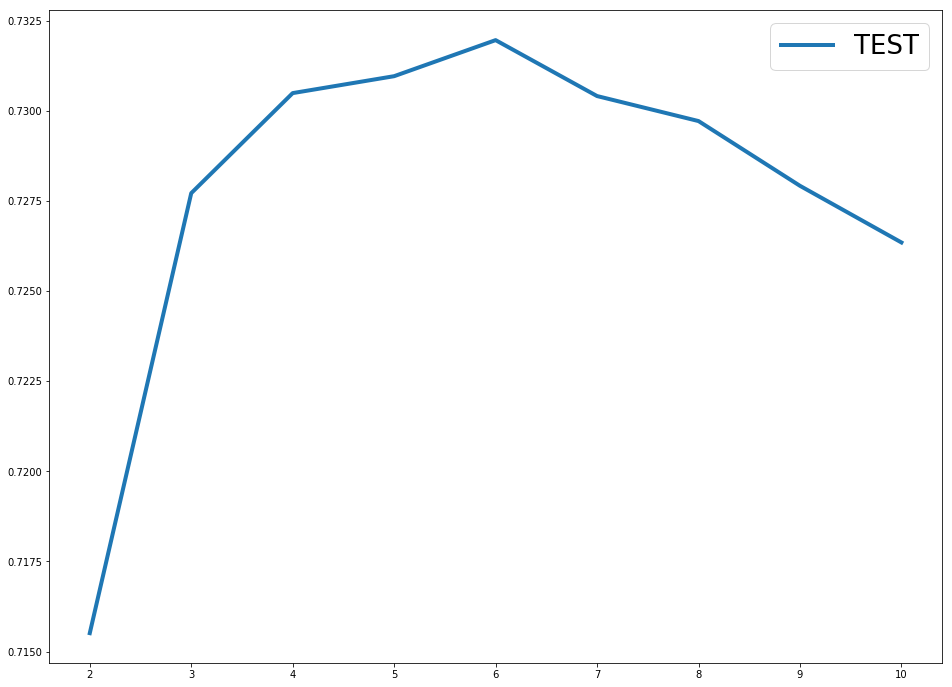

In [34]:
plt.plot(max_depth,
         np.mean([(tree_grid.cv_results_[name]) for name in names_test_score], axis=0),
         label="TEST", linewidth=4)
plt.legend(fontsize=26)

Print the best value of `max_depth` where the mean value of cross-validation quality metric reaches maximum. Also compute accuracy on holdout data. This can be done with the trained instance of the class `GridSearchCV`.

In [35]:
print("Best depth:", tree_grid.best_estimator_.get_depth())

Best depth: 6


Сalculate the effect of `GridSearchCV`: check out the expression (acc2 - acc1) / acc1 * 100%, where acc1 and acc2 are accuracies on holdout data before and after tuning max_depth with GridSearchCV respectively.

In [36]:
accuracy_score(y_valid, tree_grid.predict(X_valid))

0.7258095238095238

In [37]:
acc_2 = accuracy_score(y_valid, tree_grid.best_estimator_.predict(X_valid))
print(*list(map(lambda x: round(x, 4), (acc_2, acc_1))), sep="\n")
print()
print(round((acc_2 - acc_1)/acc_1 * 100, 2),  "%")

0.7258
0.7213

0.63 %


**<font color='red'>Question 4.</font> Choose all correct statements.**

<font color = 'red'> **Answer options:** </font>

- **There exists a local maximum of accuracy on the built validation curve + !!!!!!!!!!**
- `GridSearchCV` increased holdout accuracy by **more** than 1%
- There is **no** local maximum of accuracy on the built validation curve
- #### `GridSearchCV` increased holdout accuracy by **less** than 1% + !!!!!!!!!!!!!!

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

***
***
***

Take a look at the SCORE table to estimate ten-year risk of fatal cardiovascular disease in Europe. [Source paper](https://academic.oup.com/eurheartj/article/24/11/987/427645).

<img src='../img/SCORE2007-eng.png' width=70%>

Let's create new features according to this picture:
- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 features)
- systolic blood pressure: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 features)

If the values of age or blood pressure don't fall into any of the intervals then all binary features will be equal to zero. 

<br>Add a ``smoke`` feature.
<br>Build the ``cholesterol``  and ``gender`` features. Transform the ``cholesterol`` to 3 binary features according to it's 3 unique values ( ``cholesterol``=1,  ``cholesterol``=2 and  ``cholesterol``=3). Transform the ``gender`` from 1 and 2 into 0 and 1. It is better to rename it to ``male`` (0 – woman, 1 – man). In general, this is typically done with ``sklearn.preprocessing.LabelEncoder`` but here in case of only 2 unique values it's not necessary.

Finally, the decision tree is built using these 12 binary features (excluding all original features that we had before this feature engineering part).

Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.


*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#a2_part1_fall2019__*

In [116]:
df.head(20)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0
8,21914,1,151,67.0,120,80,0,0,0,0,59,0,1,0,0,1,0
9,22113,1,157,93.0,130,80,0,0,1,0,60,0,0,1,1,0,0
12,22584,2,178,95.0,130,90,0,0,1,1,61,0,0,1,0,0,1
13,17668,1,158,71.0,110,70,0,0,1,0,48,1,0,0,1,0,0


- $age \in [40,50), age \in [50,55), age \in [55,60), age \in [60,65) $ (4 features)
- systolic blood pressure: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 features)

In [55]:
_age = (
    (40, 50),
    (50, 55),
    (55, 60),
    (60, 65)
)

_ap_hi = (
    (120, 140),
    (140, 160),
    (160, 180)
)

In [58]:
for some in enumerate(_age):
    print(some)

(0, (40, 50))
(1, (50, 55))
(2, (55, 60))
(3, (60, 65))


In [80]:
def create_feature(pairs, x):
    for i, (left, right) in enumerate(pairs):
        if left <= x < right:
            return i
    return -1

In [112]:
new_df = pd.DataFrame()

In [113]:
new_df["smoke"] = df.smoke
new_df["age"] = df["age in years"]
for name in 'cholesterol_1 cholesterol_2 cholesterol_3'.split():
    new_df[name] = df[name]
new_df["ap_hi"] = df["ap_hi"]

In [114]:
for name, tup in (("age", _age), ("ap_hi", _ap_hi)):
    new_df[name] = new_df[name].apply(lambda x: create_feature(tup, x))

In [117]:
new_df = pd.get_dummies(new_df, columns=["age", "ap_hi"]).drop(columns=["age_-1", "ap_hi_-1"])

In [124]:
new_df['gender'] = df.gender - 1

In [125]:
new_df.head()

,smoke,cholesterol_1,cholesterol_2,cholesterol_3,age_0,age_1,age_2,age_3,ap_hi_0,ap_hi_1,ap_hi_2,gender
id,,,,,,,,,,,,
0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,1,0,1,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0


Create a decision tree with the limitation `max_depth=3` and train it on the whole train data. Use the `DecisionTreeClassifier` class with fixed `random_state=17`, but all other arguments (except for `max_depth` and `random_state`) should be left with their default values.

In [127]:
_5 = DecisionTreeClassifier(max_depth=3, random_state=17).fit(new_df, df.cardio)

In [143]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

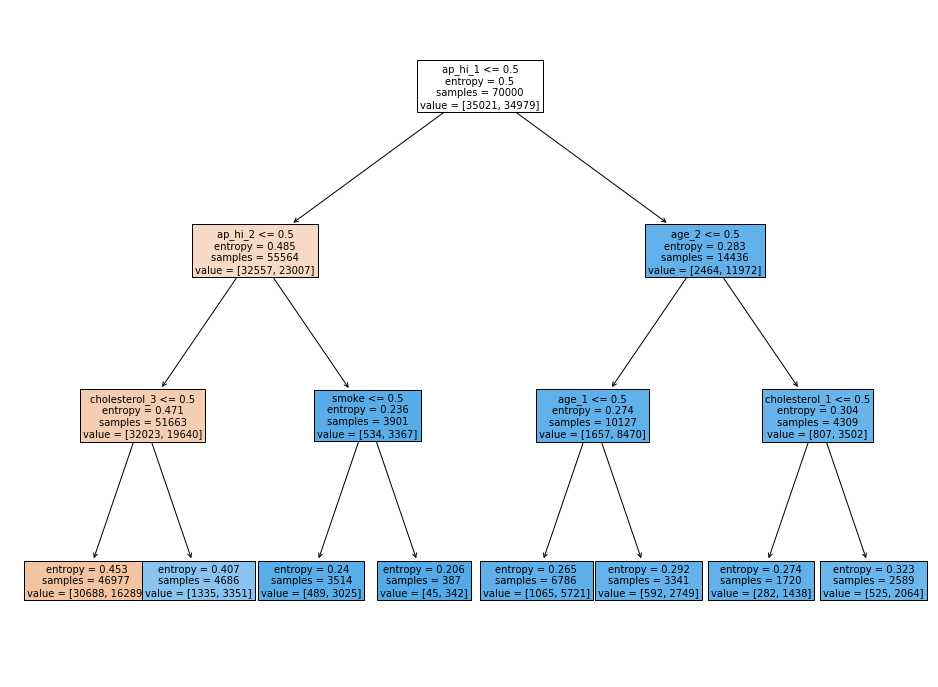

In [137]:
feature_names = "smoke cholesterol_1 cholesterol_2 cholesterol_3 age_0 age_1 age_2 age_3 ap_hi_0 ap_hi_1 ap_hi_2 gender".split()
plot_tree(_5, filled=True, feature_names=feature_names, fontsize=10);

**<font color='red'>Question 5.</font> Which binary feature is the most important for heart disease detection (i.e., it is placed in the root of the tree)?**

<font color = 'red'> **Answer options:** </font>

- Systolic blood pressure from 160 to 180 (mmHg)
- Cholesterol level == 3
- **Systolic blood pressure from 140 to 160 (mmHg)**
- Age from 50 to 55 (years)
- Smokes / doesn't smoke
- Age from 60 to 65 (years)
